In [1]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
from models import ResNet18
import os
import numpy as np

In [2]:
loss_f = nn.CrossEntropyLoss()
loss = loss_f(torch.tensor([]), torch.tensor([]))
print(loss)

tensor(nan)


In [2]:
class2label = {'AnnualCrop': 0, 
               'Forest': 1, 
               'HerbaceousVegetation': 2, 
               'Highway': 3, 
               'Industrial': 4, 
               'Pasture': 5, 
               'PermanentCrop': 6, 
               'Residential': 7, 
               'River': 8, 
               'SeaLake': 9}

def v2k(cls_label):
    label_cls = {}
    for key in cls_label.keys():
        label_cls.update({cls_label[key]: key})
    return label_cls

img_path = '/home/stu6/EuroSAT_PRML24/Task_B/train_unlabeled/data'
label_path = '/home/stu6/EuroSAT_PRML24/Task_B/train_unlabeled/pseudo_label'

In [3]:
label_cls = v2k(class2label)
img_list = os.listdir(img_path)
label_list = os.listdir(label_path)

Forest


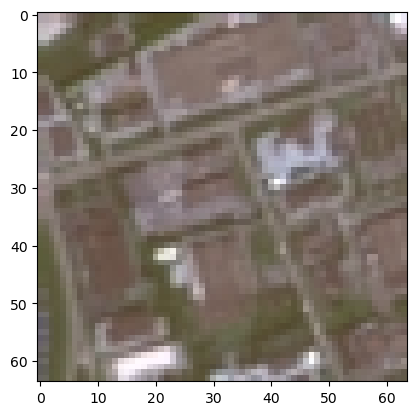

In [13]:
idx = 10010
img_name = img_list[idx]
label_name = label_list[idx]

img = os.path.join(img_path, img_name)
img = cv2.imread(img)
label = os.path.join(label_path, label_name)
label = torch.load(label)

plt.imshow(img)
label = torch.argmax(label)
print(label_cls[label.item()])